In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [45]:
data = pd.read_csv('./datos/spambase.csv')
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [47]:
print("Número de características:", len(data.columns))
print("Longitud del conjunto de datos:", len(data))

Número de características: 58
Longitud del conjunto de datos: 4601


In [50]:
# 1813 correos considerados como spam, 2788 correos no spam
data["class"].value_counts()

0    2788
1    1813
Name: class, dtype: int64

In [51]:
# Visualizamos los tipos de cada uno de los atributos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [53]:
# Comprobamos si alguna columna tiene valores nulos
data.isna().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [55]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


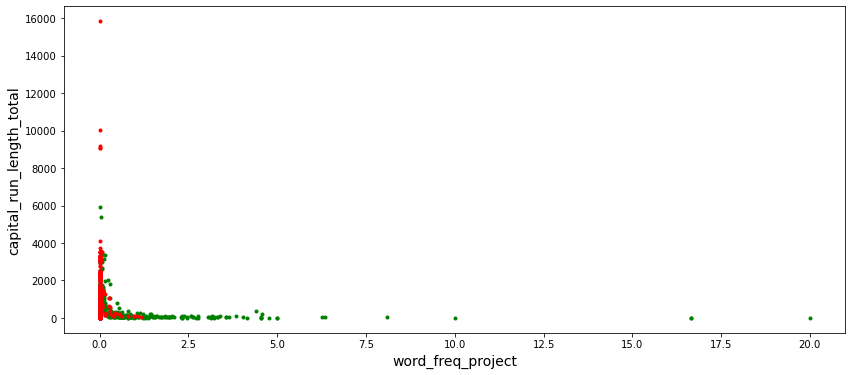

In [58]:
# Representación gráfica de dos atributos
plt.figure(figsize=(14, 6))
plt.scatter(data["word_freq_project"][data['class'] == 0], data["capital_run_length_total"][data['class'] == 0], c="g", marker=".")
plt.scatter(data["word_freq_project"][data['class'] == 1], data["capital_run_length_total"][data['class'] == 1], c="r", marker=".")
plt.xlabel("word_freq_project", fontsize=14)
plt.ylabel("capital_run_length_total", fontsize=14)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [59]:
X = data.loc[:,'word_freq_make':'capital_run_length_total'].values 
y = data["class"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [63]:
X_train.shape

(3220, 57)

In [64]:
X_test.shape

(690, 57)

In [65]:
X_val.shape

(691, 57)

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [68]:
scaler.fit(X_train)

MinMaxScaler()

In [69]:
X_train = scaler.transform(X_train)

In [70]:
X_test = scaler.transform(X_test)

In [71]:
X_val = scaler.transform(X_val)

In [72]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.00061371, 0.00140168,
        0.00556605],
       [0.        , 0.        , 0.        , ..., 0.00255288, 0.0015018 ,
        0.00596362],
       [0.07268722, 0.        , 0.06470588, ..., 0.00538538, 0.00420505,
        0.05088957],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00121017, 0.00090108,
        0.0047709 ],
       [0.        , 0.01610644, 0.        , ..., 0.00055924, 0.00120144,
        0.01709572],
       [0.02202643, 0.        , 0.08039216, ..., 0.00083069, 0.00280336,
        0.03359507]])

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [84]:
model = Sequential()
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy', 'Precision'])


In [85]:
history = model.fit(X_train, 
                    y_train,
                   epochs=500,
                   validation_data=(X_val, y_val))

Epoch 1/500
101/101 [==============================] - 1s 3ms/step - loss: 0.6714 - accuracy: 0.6066 - precision: 0.0000e+00 - val_loss: 0.6889 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 2/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6248 - precision: 0.0000e+00 - val_loss: 0.6865 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 3/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6146 - precision: 0.0000e+00 - val_loss: 0.6859 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 4/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.6283 - precision: 0.0000e+00 - val_loss: 0.6858 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 5/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.6149 - precision: 0.0000e+00 - val_loss: 0.6873 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 6/500
101/101 [====

Epoch 43/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.6206 - precision: 0.0000e+00 - val_loss: 0.6857 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 44/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.6239 - precision: 0.0000e+00 - val_loss: 0.6852 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 45/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5947 - precision: 0.0000e+00 - val_loss: 0.6881 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 46/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.6089 - precision: 0.0000e+00 - val_loss: 0.6869 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 47/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6663 - accuracy: 0.6157 - precision: 0.0000e+00 - val_loss: 0.6855 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 48/500
101/101

Epoch 85/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.6227 - precision: 0.0000e+00 - val_loss: 0.6849 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 86/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.6250 - precision: 0.0000e+00 - val_loss: 0.6851 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 87/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6209 - precision: 0.0000e+00 - val_loss: 0.6868 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 88/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6087 - precision: 0.0000e+00 - val_loss: 0.6864 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 89/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6625 - accuracy: 0.6231 - precision: 0.0000e+00 - val_loss: 0.6856 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 90/500
101/101

Epoch 127/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.6174 - precision: 0.0000e+00 - val_loss: 0.6852 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 128/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.6157 - precision: 0.0000e+00 - val_loss: 0.6862 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 129/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.6205 - precision: 0.0000e+00 - val_loss: 0.6837 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 130/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.6213 - precision: 0.0000e+00 - val_loss: 0.6849 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 131/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6057 - precision: 0.0000e+00 - val_loss: 0.6876 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 132/500
1

101/101 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.6210 - precision: 0.0000e+00 - val_loss: 0.6852 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 169/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.6148 - precision: 0.0000e+00 - val_loss: 0.6857 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 170/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.6162 - precision: 0.0000e+00 - val_loss: 0.6864 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 171/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.6089 - precision: 0.0000e+00 - val_loss: 0.6869 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 172/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.6189 - precision: 0.0000e+00 - val_loss: 0.6851 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 173/500
101/101 [======

Epoch 210/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6145 - precision: 0.0000e+00 - val_loss: 0.6848 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 211/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6087 - precision: 0.0000e+00 - val_loss: 0.6866 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 212/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6304 - precision: 0.0000e+00 - val_loss: 0.6851 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 213/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.6158 - precision: 0.0000e+00 - val_loss: 0.6844 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 214/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6193 - precision: 0.0000e+00 - val_loss: 0.6853 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 215/500
1

101/101 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.6247 - precision: 0.0000e+00 - val_loss: 0.6840 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 252/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.6107 - precision: 0.0000e+00 - val_loss: 0.6861 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 253/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.6038 - precision: 0.0000e+00 - val_loss: 0.6871 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 254/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.6236 - precision: 0.0000e+00 - val_loss: 0.6840 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 255/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.6023 - precision: 0.0000e+00 - val_loss: 0.6865 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 256/500
101/101 [======

Epoch 293/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6164 - precision: 0.0000e+00 - val_loss: 0.6837 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 294/500
101/101 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6209 - precision: 0.0000e+00 - val_loss: 0.6823 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 295/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6223 - precision: 0.0000e+00 - val_loss: 0.6845 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 296/500
101/101 [==============================] - 0s 966us/step - loss: 0.6627 - accuracy: 0.6197 - precision: 0.0000e+00 - val_loss: 0.6832 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 297/500
101/101 [==============================] - 0s 957us/step - loss: 0.6598 - accuracy: 0.6262 - precision: 0.0000e+00 - val_loss: 0.6837 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 298/5

101/101 [==============================] - 0s 974us/step - loss: 0.6635 - accuracy: 0.6177 - precision: 0.0000e+00 - val_loss: 0.6835 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 335/500
101/101 [==============================] - 0s 969us/step - loss: 0.6637 - accuracy: 0.6167 - precision: 0.0000e+00 - val_loss: 0.6834 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 336/500
101/101 [==============================] - 0s 977us/step - loss: 0.6643 - accuracy: 0.6157 - precision: 0.0000e+00 - val_loss: 0.6836 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 337/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.6002 - precision: 0.0000e+00 - val_loss: 0.6853 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 338/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.6344 - precision: 0.0000e+00 - val_loss: 0.6823 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 339/500
101/101 [

Epoch 376/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6192 - precision: 0.0000e+00 - val_loss: 0.6828 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 377/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.6089 - precision: 0.0000e+00 - val_loss: 0.6837 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 378/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.5995 - precision: 0.0000e+00 - val_loss: 0.6855 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 379/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.6075 - precision: 0.0000e+00 - val_loss: 0.6830 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 380/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.6145 - precision: 0.0000e+00 - val_loss: 0.6820 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 381/500
1

101/101 [==============================] - 0s 990us/step - loss: 0.6609 - accuracy: 0.6191 - precision: 0.0000e+00 - val_loss: 0.6808 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 418/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6146 - precision: 0.0000e+00 - val_loss: 0.6802 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 419/500
101/101 [==============================] - 0s 976us/step - loss: 0.6703 - accuracy: 0.5964 - precision: 0.0000e+00 - val_loss: 0.6851 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 420/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.6348 - precision: 0.0000e+00 - val_loss: 0.6794 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 421/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6172 - precision: 0.0000e+00 - val_loss: 0.6819 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 422/500
101/101 [==

101/101 [==============================] - 0s 987us/step - loss: 0.6568 - accuracy: 0.6239 - precision: 0.0000e+00 - val_loss: 0.6783 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 459/500
101/101 [==============================] - 0s 989us/step - loss: 0.6552 - accuracy: 0.6284 - precision: 0.0000e+00 - val_loss: 0.6789 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 460/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.6045 - precision: 0.0000e+00 - val_loss: 0.6821 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 461/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6139 - precision: 0.0000e+00 - val_loss: 0.6808 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 462/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6131 - precision: 0.0000e+00 - val_loss: 0.6807 - val_accuracy: 0.5731 - val_precision: 0.0000e+00
Epoch 463/500
101/101 [==

Epoch 500/500
101/101 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.6117 - precision: 0.0000e+00 - val_loss: 0.6761 - val_accuracy: 0.5731 - val_precision: 0.0000e+00


In [229]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0000, accuracy: 22.5490%
Evaluating on testing set...
loss=0.0000, accuracy: 18.2777%


KeyError: 'val_accuracy'

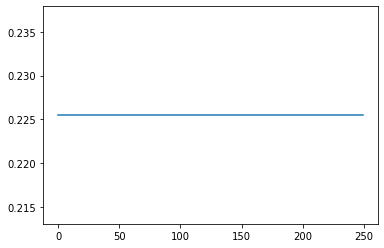

In [230]:
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

In [ ]:
data["esrb_rating"].unique()

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
data['esrb_rating']= label_encoder.fit_transform(data['esrb_rating']) 
  
data['esrb_rating'].unique()

In [ ]:
data